`conda env create -n caiman_env -f optinist/conda/caiman_env.yaml`

In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [2]:
from optinist.wrappers.caiman_wrapper import motion_correction, cnmf
from optinist.api.dataclass.dataclass import ImageData

In [4]:
sample_data = ImageData(["../sample_data/mouse2p_2_donotouse.tiff"])

In [5]:
motion_correction_params = {
    'border_nan': 'copy', 
    'gSig_filt': None, 
    'is3D': False, 
    'max_deviation_rigid': 3, 
    'max_shifts': [6, 6], 
    'min_mov': None, 
    'niter_rig': 1, 
    'nonneg_movie': True, 
    'num_frames_split': 80, 
    'num_splits_to_process_els': None, 
    'num_splits_to_process_rig': None, 
    'overlaps': [32, 32], 
    'pw_rigid': False, 
    'shifts_opencv': True, 
    'splits_els': 14, 
    'splits_rig': 14, 
    'strides': [96, 96], 
    'upsample_factor_grid': 4, 
    'use_cuda': False
}

In [6]:
ret = motion_correction.caiman_mc(sample_data, motion_correction_params)

2023-03-23 03:24:42.676568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


start Construction for MotionCorrect
type check list 
type check tuple
cuda check
end Construction for MotionCorrect
Start motion correct
gSig_filt is None
movie iterate
No motion_correct_pwrigid
motion_correct_rigid
motion_correct_batch_rigid
load
iteration start
motion_correction_piecewise
process frame
end process frame
None 14 <class 'NoneType'>
tile_and_correct_wrapper
start imgs iterate
end imgs iterate
end tile_and_correct_wrapper
tile_and_correct_wrapper
start imgs iterate
end imgs iterate
end tile_and_correct_wrapper
tile_and_correct_wrapper
start imgs iterate
end imgs iterate
end tile_and_correct_wrapper
tile_and_correct_wrapper
start imgs iterate
end imgs iterate
end tile_and_correct_wrapper
tile_and_correct_wrapper
start imgs iterate
end imgs iterate
end tile_and_correct_wrapper
tile_and_correct_wrapper
start imgs iterate
end imgs iterate
end tile_and_correct_wrapper
tile_and_correct_wrapper
start imgs iterate
end imgs iterate
end tile_and_correct_wrapper
tile_and_correct_w

/Users/keita/opt/anaconda3/envs/caiman_env/lib/python3.8/site-packages/caiman/base/rois.py:141: FutureWarning: `selem` is a deprecated argument name for `dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  temp = dilation(temp, selem=selem)


In [7]:
caiman_cnmf_params = {
    'p': 1,
    'nb': 2,
    'merge_thr': 0.85,
    'rf': None,
    'stride': 6,
    'K': 4,
    'gSig': [4, 4], 
    'method_init': 'greedy_roi',
    'ssub': 1,
    'tsub': 1,
    'thr': 0.9,
}

2023-03-23 03:25:31.399660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 03:25:31.571312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 03:25:31.663368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

Decode mmap filename /tmp/optinist/output/tiff/mc_images/mc_images.tif_d1_128_d2_128_d3_1_order_C_frames_1000.mmap
Decode mmap filename /tmp/optinist/output/tiff/mc_images/mc_images.tif_d1_128_d2_128_d3_1_order_C_frames_1000.mmap
Decode mmap filename /tmp/optinist/output/tiff/mc_images/mc_images.tif_d1_128_d2_128_d3_1_order_C_frames_1000.mmap
Decode mmap filename /tmp/optinist/output/tiff/mc_images/mc_images.tif_d1_128_d2_128_d3_1_order_C_frames_1000.mmap
Decode mmap filename /tmp/optinist/output/tiff/mc_images/mc_images.tif_d1_128_d2_128_d3_1_order_C_frames_1000.mmap
Decode mmap filename /tmp/optinist/output/tiff/mc_images/mc_images.tif_d1_128_d2_128_d3_1_order_C_frames_1000.mmap
Decode mmap filename /tmp/optinist/output/tiff/mc_images/mc_images.tif_d1_128_d2_128_d3_1_order_C_frames_1000.mmap
Decode mmap filename /tmp/optinist/output/tiff/mc_images/mc_images.tif_d1_128_d2_128_d3_1_order_C_frames_1000.mmap
Decode mmap filename /tmp/optinist/output/tiff/mc_images/mc_images.tif_d1_128_d2

/Users/keita/Code/optinist_test/optinist/wrappers/caiman_wrapper/cnmf.py:144: RuntimeWarning: All-NaN slice encountered
  all_roi = np.nanmax(np.stack([cell_roi, non_cell_roi]), axis=0)


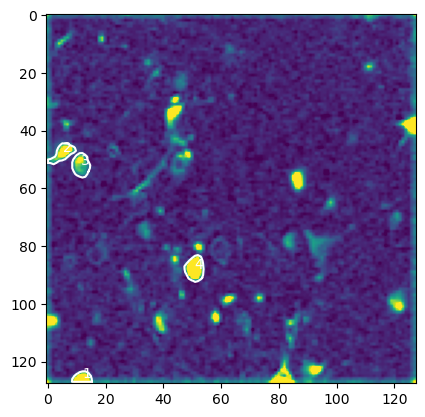

In [8]:
ret = cnmf.caiman_cnmf(ret['mc_images'], caiman_cnmf_params)